In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pickle
import pynbody
pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue, pynbody.halo.hop.HOPCatalogue]

%matplotlib inline
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})

In [2]:
def cumulative_sfh(halo):
    age = 13.800797497330507
    try:
        sfh, bins = pynbody.plot.stars.sfh(halo.s, filename=None, massform=False, clear=False, legend=False, subplot=False, trange=False, bins=128)
        plt.clf()
    except ValueError:
        print(f'Cannot create SFH, only {len(halo.s)} star particles')
        raise
        
    sfhmstar = np.sum(sfh)
    bincenters = 0.5*(bins[1:]+bins[:-1])
    c_sfh = np.empty(shape=sfh.shape)
    for i in range(len(bincenters)):
        c_sfh[i] = np.sum(sfh[:i+1])/sfhmstar
    return c_sfh,age-bincenters

In [3]:
sims = ['/home/akinshol/Data/Sims/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096', 
        '/home/akinshol/Data/Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096',
        '/home/akinshol/Data/Sims/newh242/h242.cosmo50PLK.3072gst5HbwK1BH.004096',
        '/home/akinshol/Data/Sims/newh329/h329.cosmo50PLK.3072gst5HbwK1BH.004096']
nums = [[1, 2, 3, 5, 6, 9, 10, 11, 12, 14, 18, 23, 26, 28, 30, 31, 34, 36, 38, 42, 45, 46, 55, 57, 60, 64, 77, 80, 94, 99, 115, 125, 126, 131, 160, 223, 252, 264, 271, 304, 353, 372, 373, 435, 465, 590, 647, 677, 682, 738, 869, 961, 980, 1146, 1155, 1381, 2792, 4897],
        [1, 2, 4, 7, 16, 17, 21, 22, 27, 29, 33, 50, 51, 52, 56, 60, 62, 70, 95, 104, 134, 203, 277, 553, 982, 1319, 1409, 1481, 5722],
        [407, 1, 4, 10, 21, 27, 31, 35, 37, 45, 47, 48, 49, 67, 71, 81, 102, 131, 418, 1534, 2551, 8678, 9724, 11563],
        [119, 1, 7, 29, 31, 32, 55, 94, 116, 131, 154, 443, 490, 786, 1182]]
names = ['h148','h229','h242','h329']


In [4]:
x = 3
sim = sims[x]
num = nums[x]
name = names[x]

c_sfhs = []
bcs = []

s = pynbody.load(sim)
s.physical_units()
h = s.halos()
print('Loaded simulation %s' % name)
for i in num:
    c_sfh, bc = cumulative_sfh(h[i])
    print('Finished halo %s' % i)
    c_sfhs.append(c_sfh)
    bcs.append(bc)

Loaded simulation h329
Finished halo 119
Finished halo 1
Finished halo 7
Finished halo 29
Finished halo 31
Finished halo 32


/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/array.py:346: RuntimeWarning: invalid value encountered in true_divide
  return np.ndarray.__truediv__(self, rhs)


Finished halo 55
Finished halo 94
Finished halo 116
Finished halo 131
Finished halo 154
Finished halo 443
Finished halo 490
Finished halo 786
Finished halo 1182


<Figure size 3000x1800 with 0 Axes>

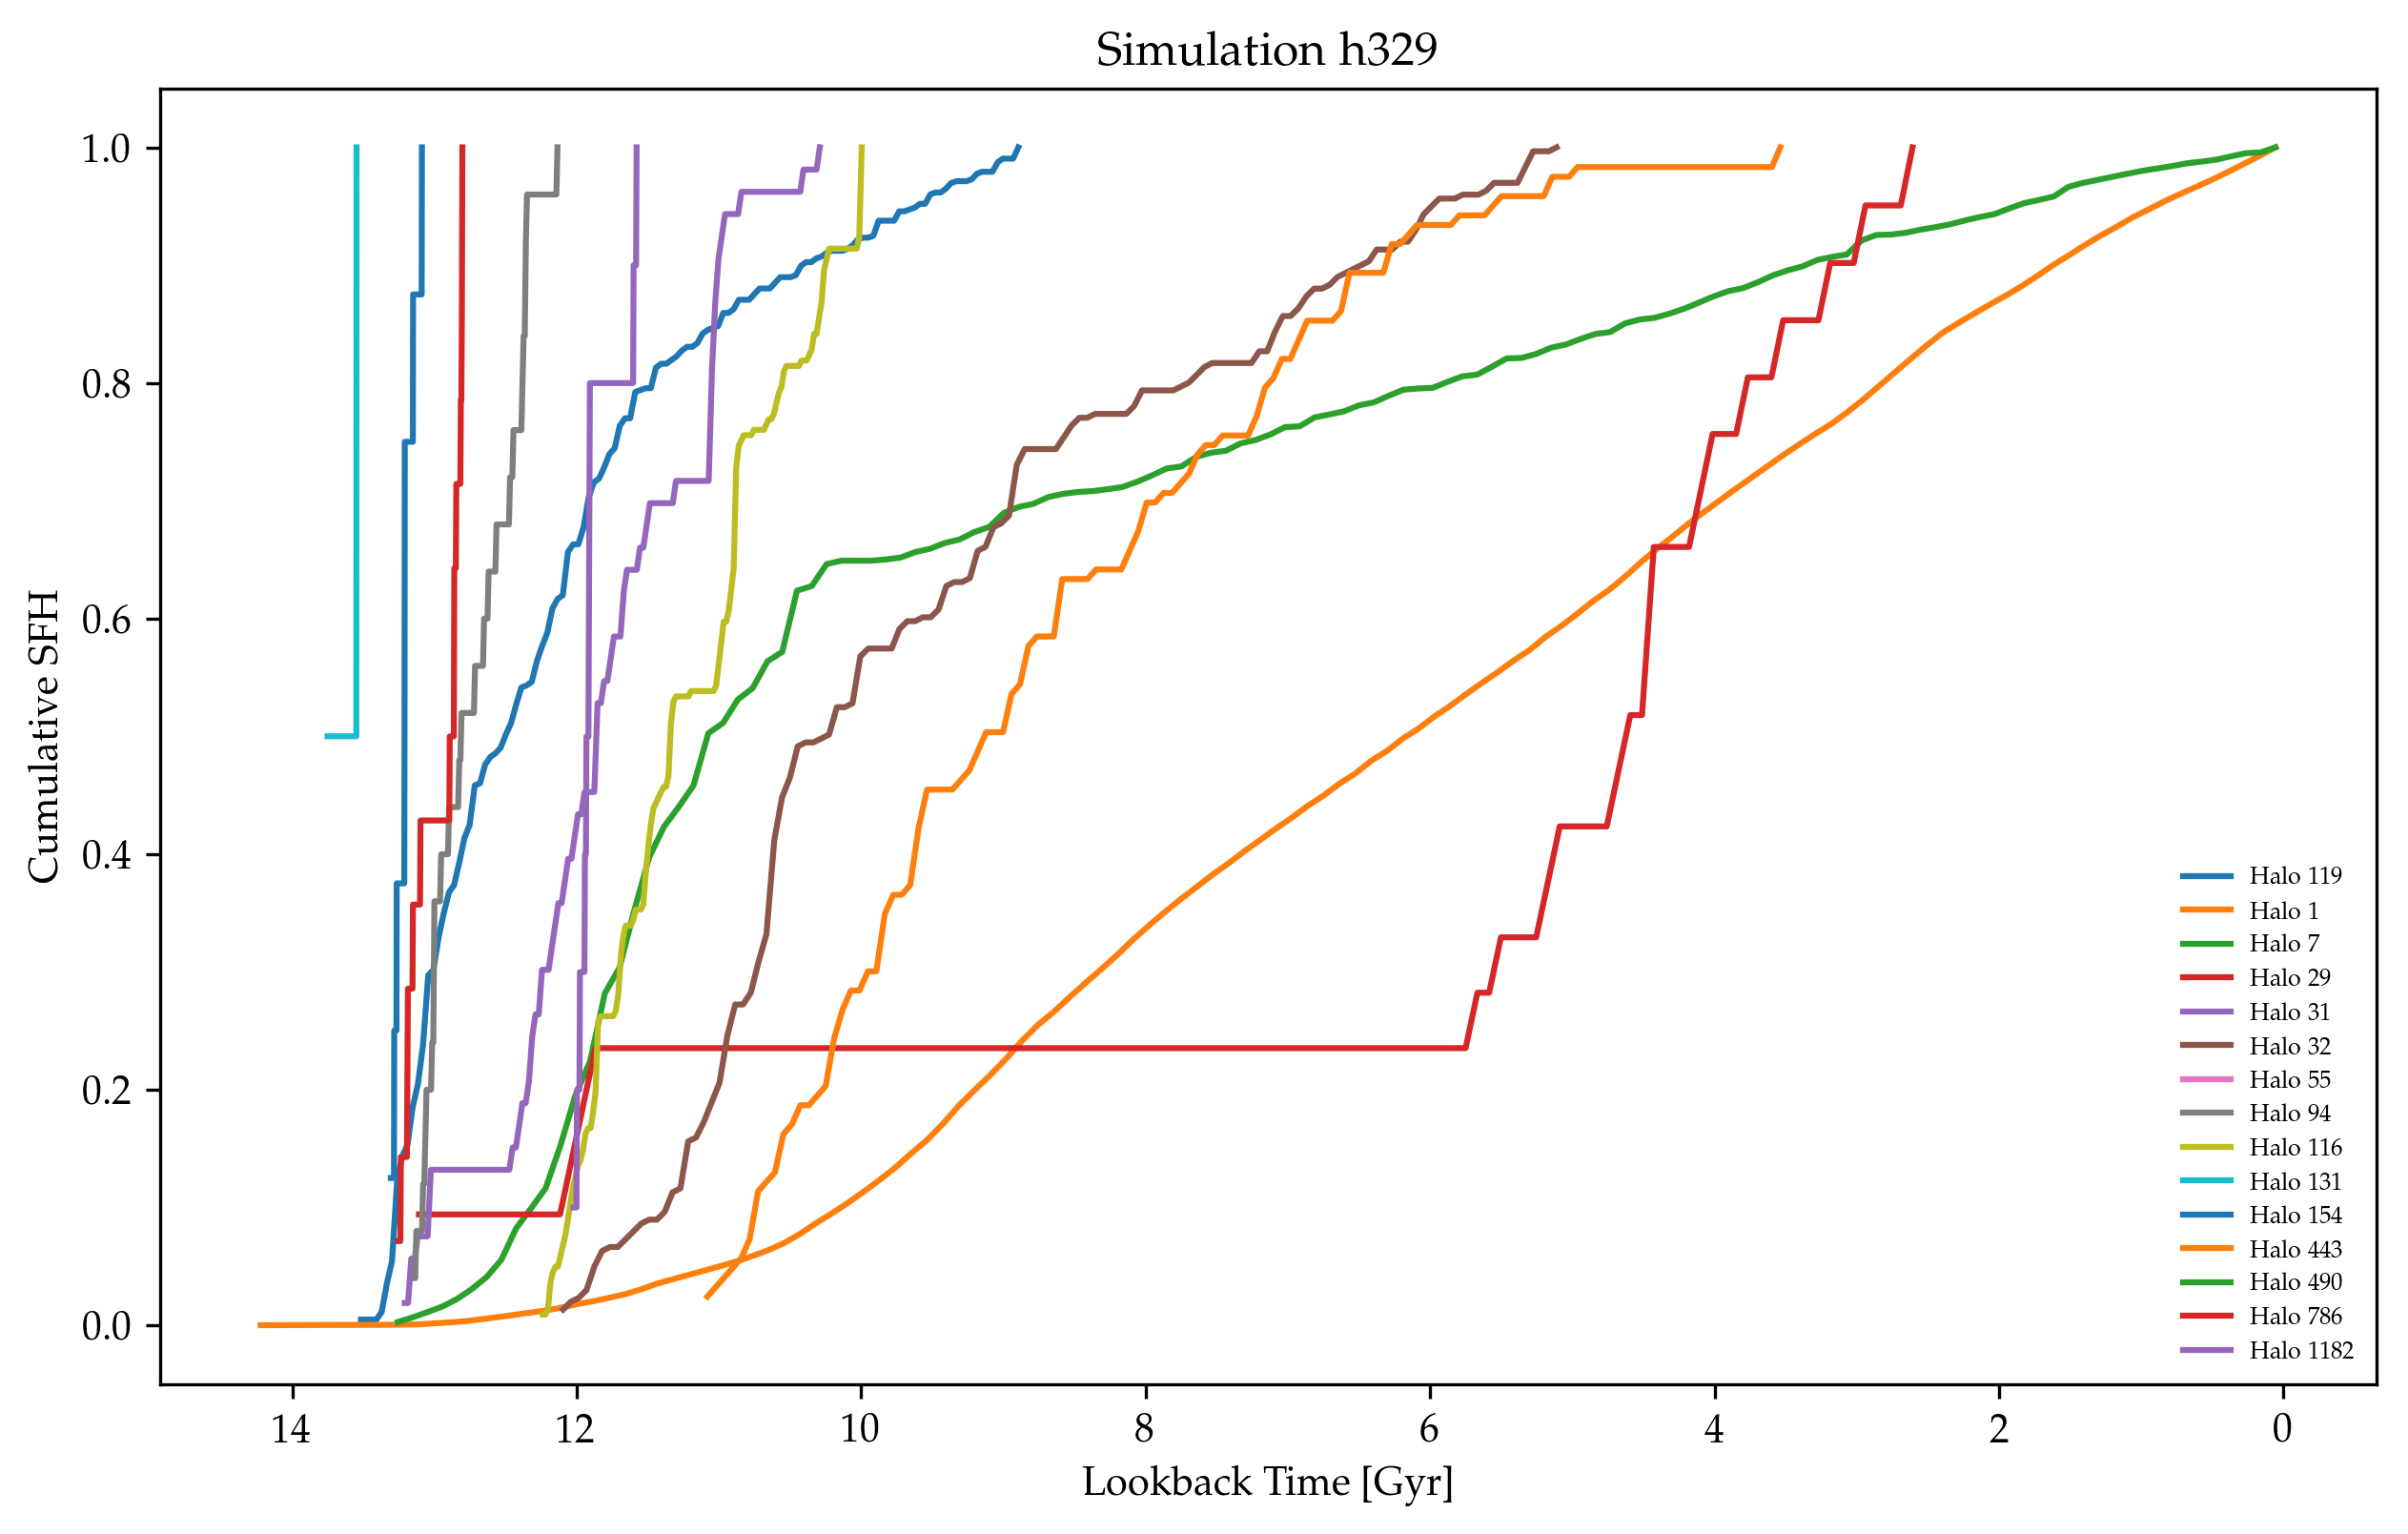

In [10]:
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(10,6),dpi=300)
for i in range(len(c_sfhs)):
    ax.plot(bcs[i],c_sfhs[i],label='Halo %s' % num[i])
ax.set_xlabel('Lookback Time [Gyr]')
ax.set_ylabel('Cumulative SFH')
ax.set_title('Simulation %s' % name)
ax.invert_xaxis()
ax.legend(prop={'size':6},frameon=False)
plt.show()

In [11]:
x = 2
sim = sims[x]
num = nums[x]
name = names[x]

c_sfhs = []
bcs = []

s = pynbody.load(sim)
s.physical_units()
h = s.halos()
print('Loaded simulation %s' % name)
for i in num:
    c_sfh, bc = cumulative_sfh(h[i])
    print('Finished halo %s' % i)
    c_sfhs.append(c_sfh)
    bcs.append(bc)

Loaded simulation h242
Finished halo 407
Finished halo 1
Finished halo 4
Finished halo 10
Finished halo 21
Finished halo 27
Finished halo 31
Finished halo 35
Finished halo 37
Finished halo 45
Finished halo 47
Finished halo 48


/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/plot/stars.py:632: RuntimeWarning: divide by zero encountered in true_divide
  binnorm = 1e-9 * bins / (trange[1] - trange[0])
/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/array.py:346: RuntimeWarning: invalid value encountered in true_divide
  return np.ndarray.__truediv__(self, rhs)


Finished halo 49
Finished halo 67
Finished halo 71
Finished halo 81
Finished halo 102
Finished halo 131
Finished halo 418
Finished halo 1534
Finished halo 2551
Finished halo 8678
Finished halo 9724
Finished halo 11563


<Figure size 432x288 with 0 Axes>

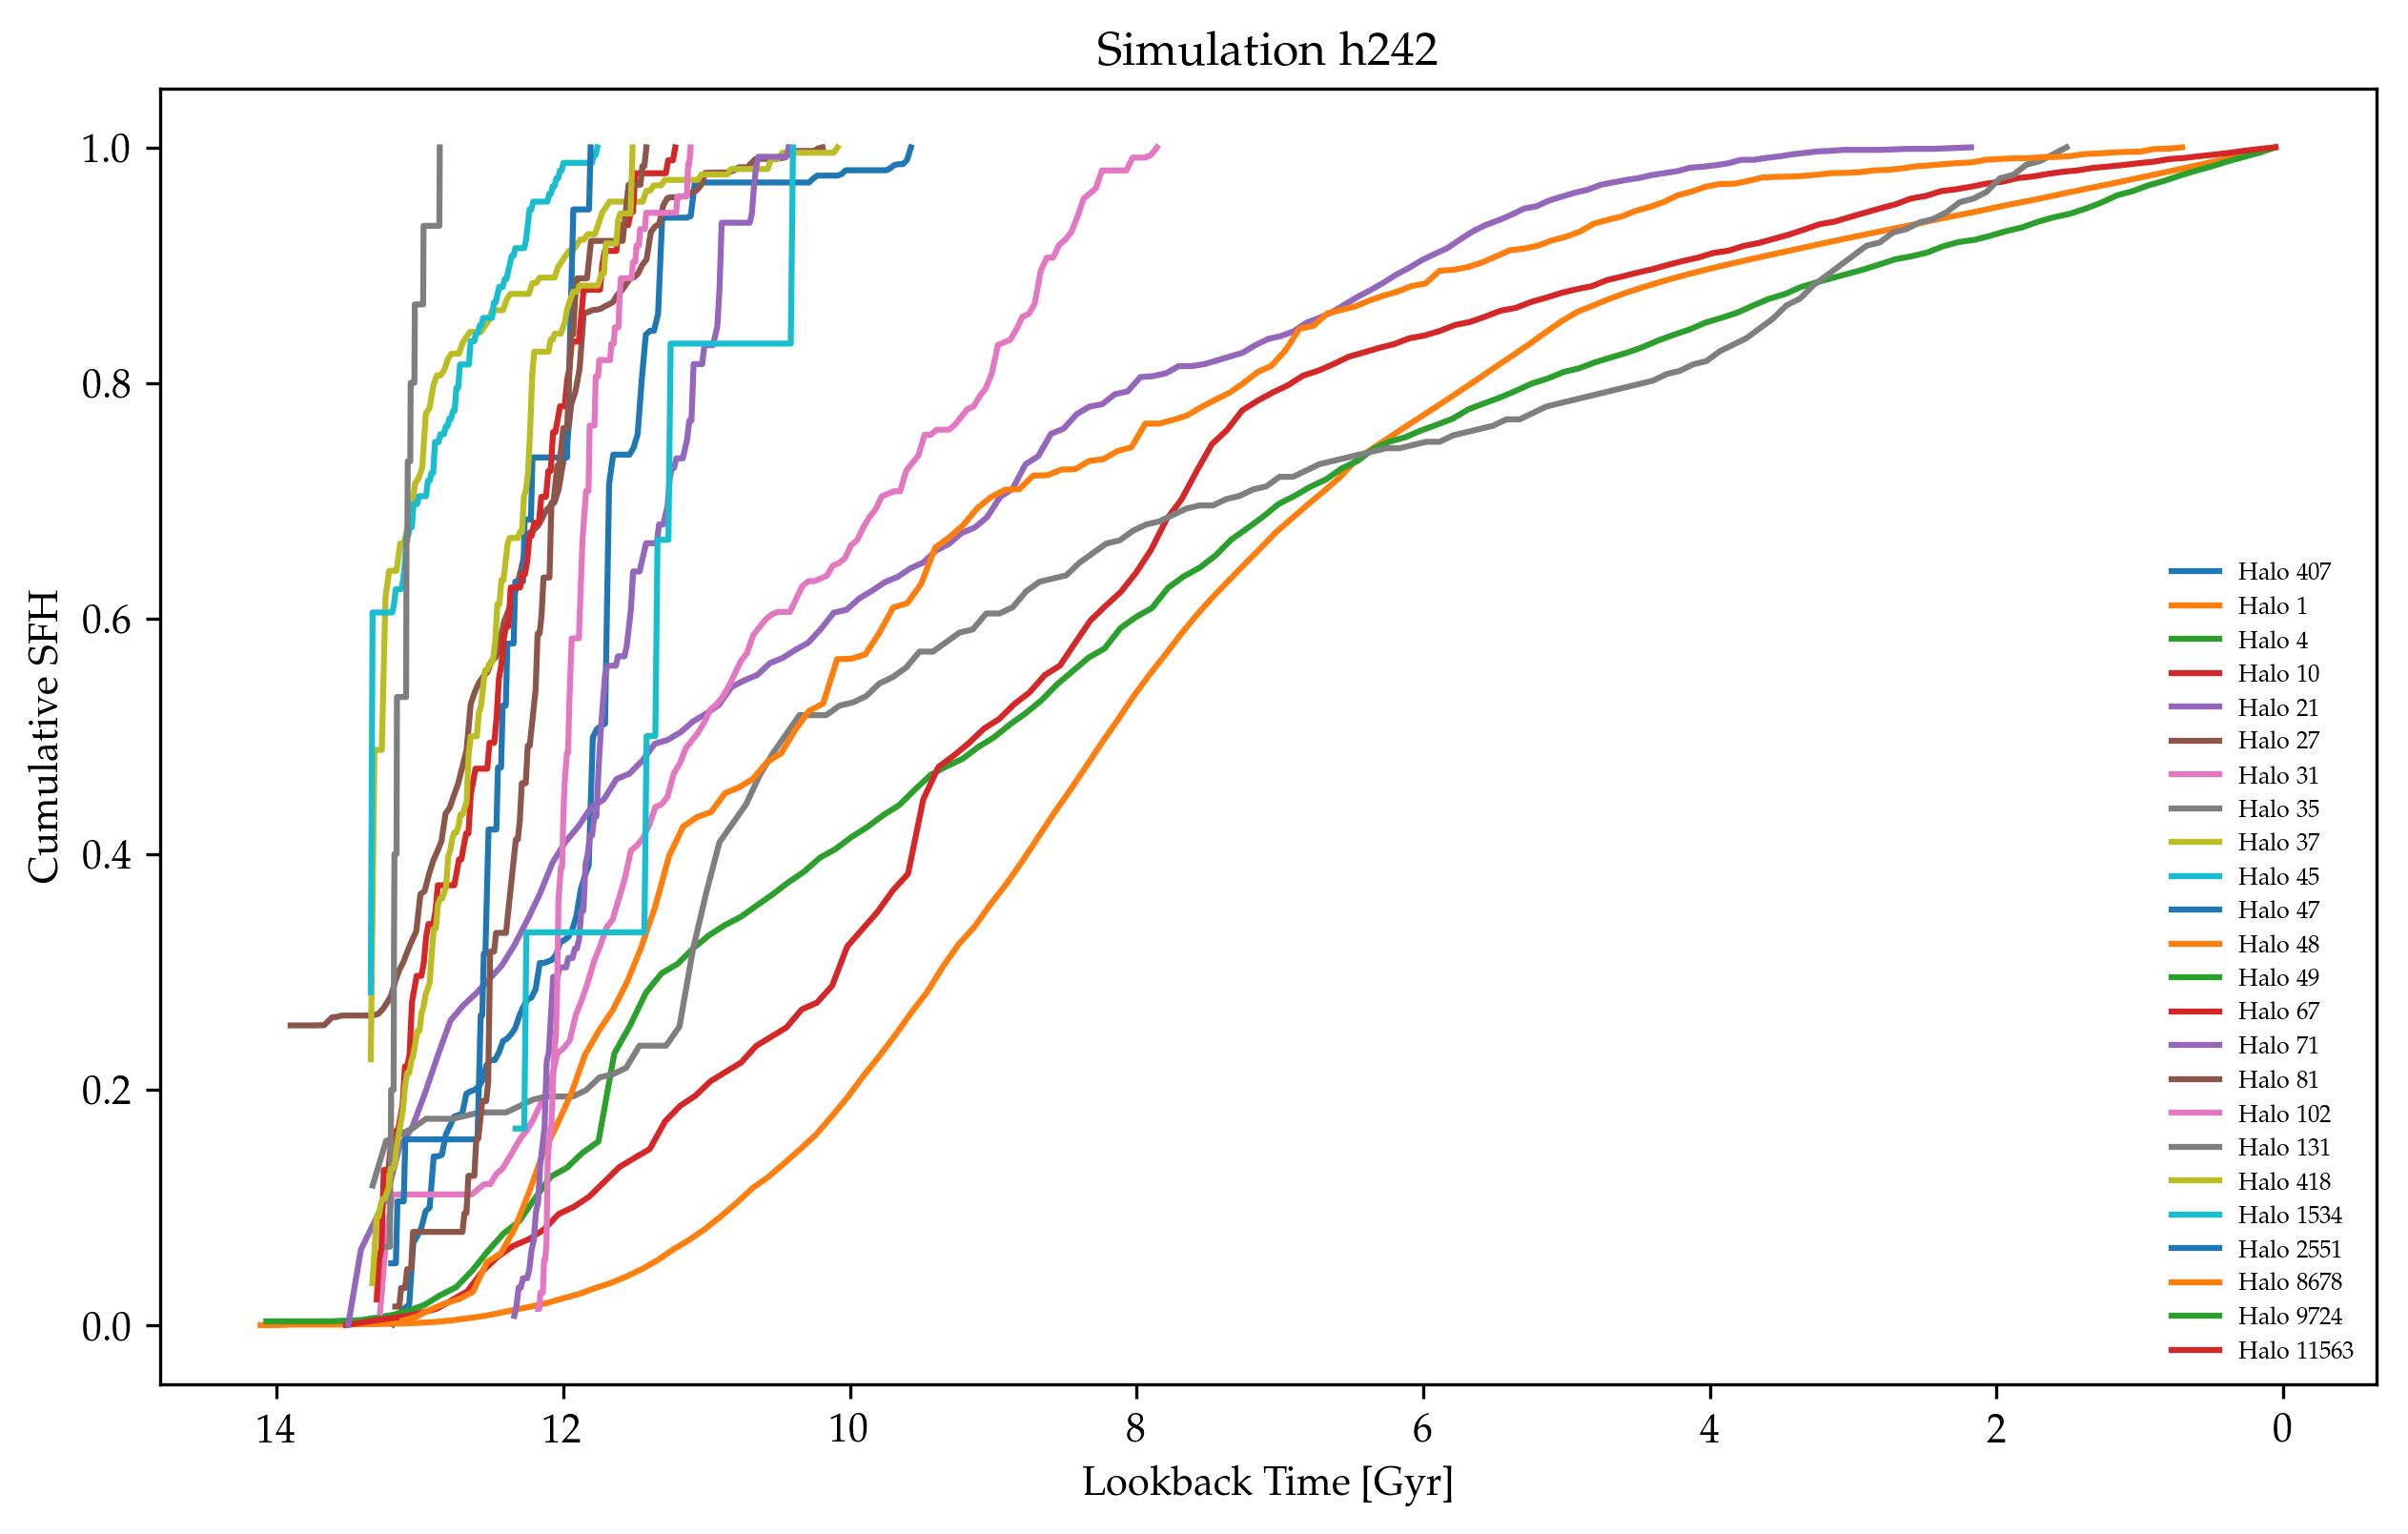

In [12]:
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(10,6),dpi=300)
for i in range(len(c_sfhs)):
    ax.plot(bcs[i],c_sfhs[i],label='Halo %s' % num[i])
ax.set_xlabel('Lookback Time [Gyr]')
ax.set_ylabel('Cumulative SFH')
ax.set_title('Simulation %s' % name)
ax.invert_xaxis()
ax.legend(prop={'size':6},frameon=False)
plt.show()

In [13]:
x = 1
sim = sims[x]
num = nums[x]
name = names[x]

c_sfhs = []
bcs = []

s = pynbody.load(sim)
s.physical_units()
h = s.halos()
print('Loaded simulation %s' % name)
for i in num:
    c_sfh, bc = cumulative_sfh(h[i])
    print('Finished halo %s' % i)
    c_sfhs.append(c_sfh)
    bcs.append(bc)

Loaded simulation h229
Finished halo 1
Finished halo 2
Finished halo 4
Finished halo 7
Finished halo 16
Finished halo 17
Finished halo 21
Finished halo 22
Finished halo 27


/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/plot/stars.py:632: RuntimeWarning: divide by zero encountered in true_divide
  binnorm = 1e-9 * bins / (trange[1] - trange[0])
/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/array.py:346: RuntimeWarning: invalid value encountered in true_divide
  return np.ndarray.__truediv__(self, rhs)


Finished halo 29
Finished halo 33
Finished halo 50
Finished halo 51
Finished halo 52
Finished halo 56
Finished halo 60
Finished halo 62
Finished halo 70
Finished halo 95
Finished halo 104
Finished halo 134
Finished halo 203
Finished halo 277
Finished halo 553
Finished halo 982
Finished halo 1319
Finished halo 1409
Finished halo 1481
Finished halo 5722


<Figure size 432x288 with 0 Axes>

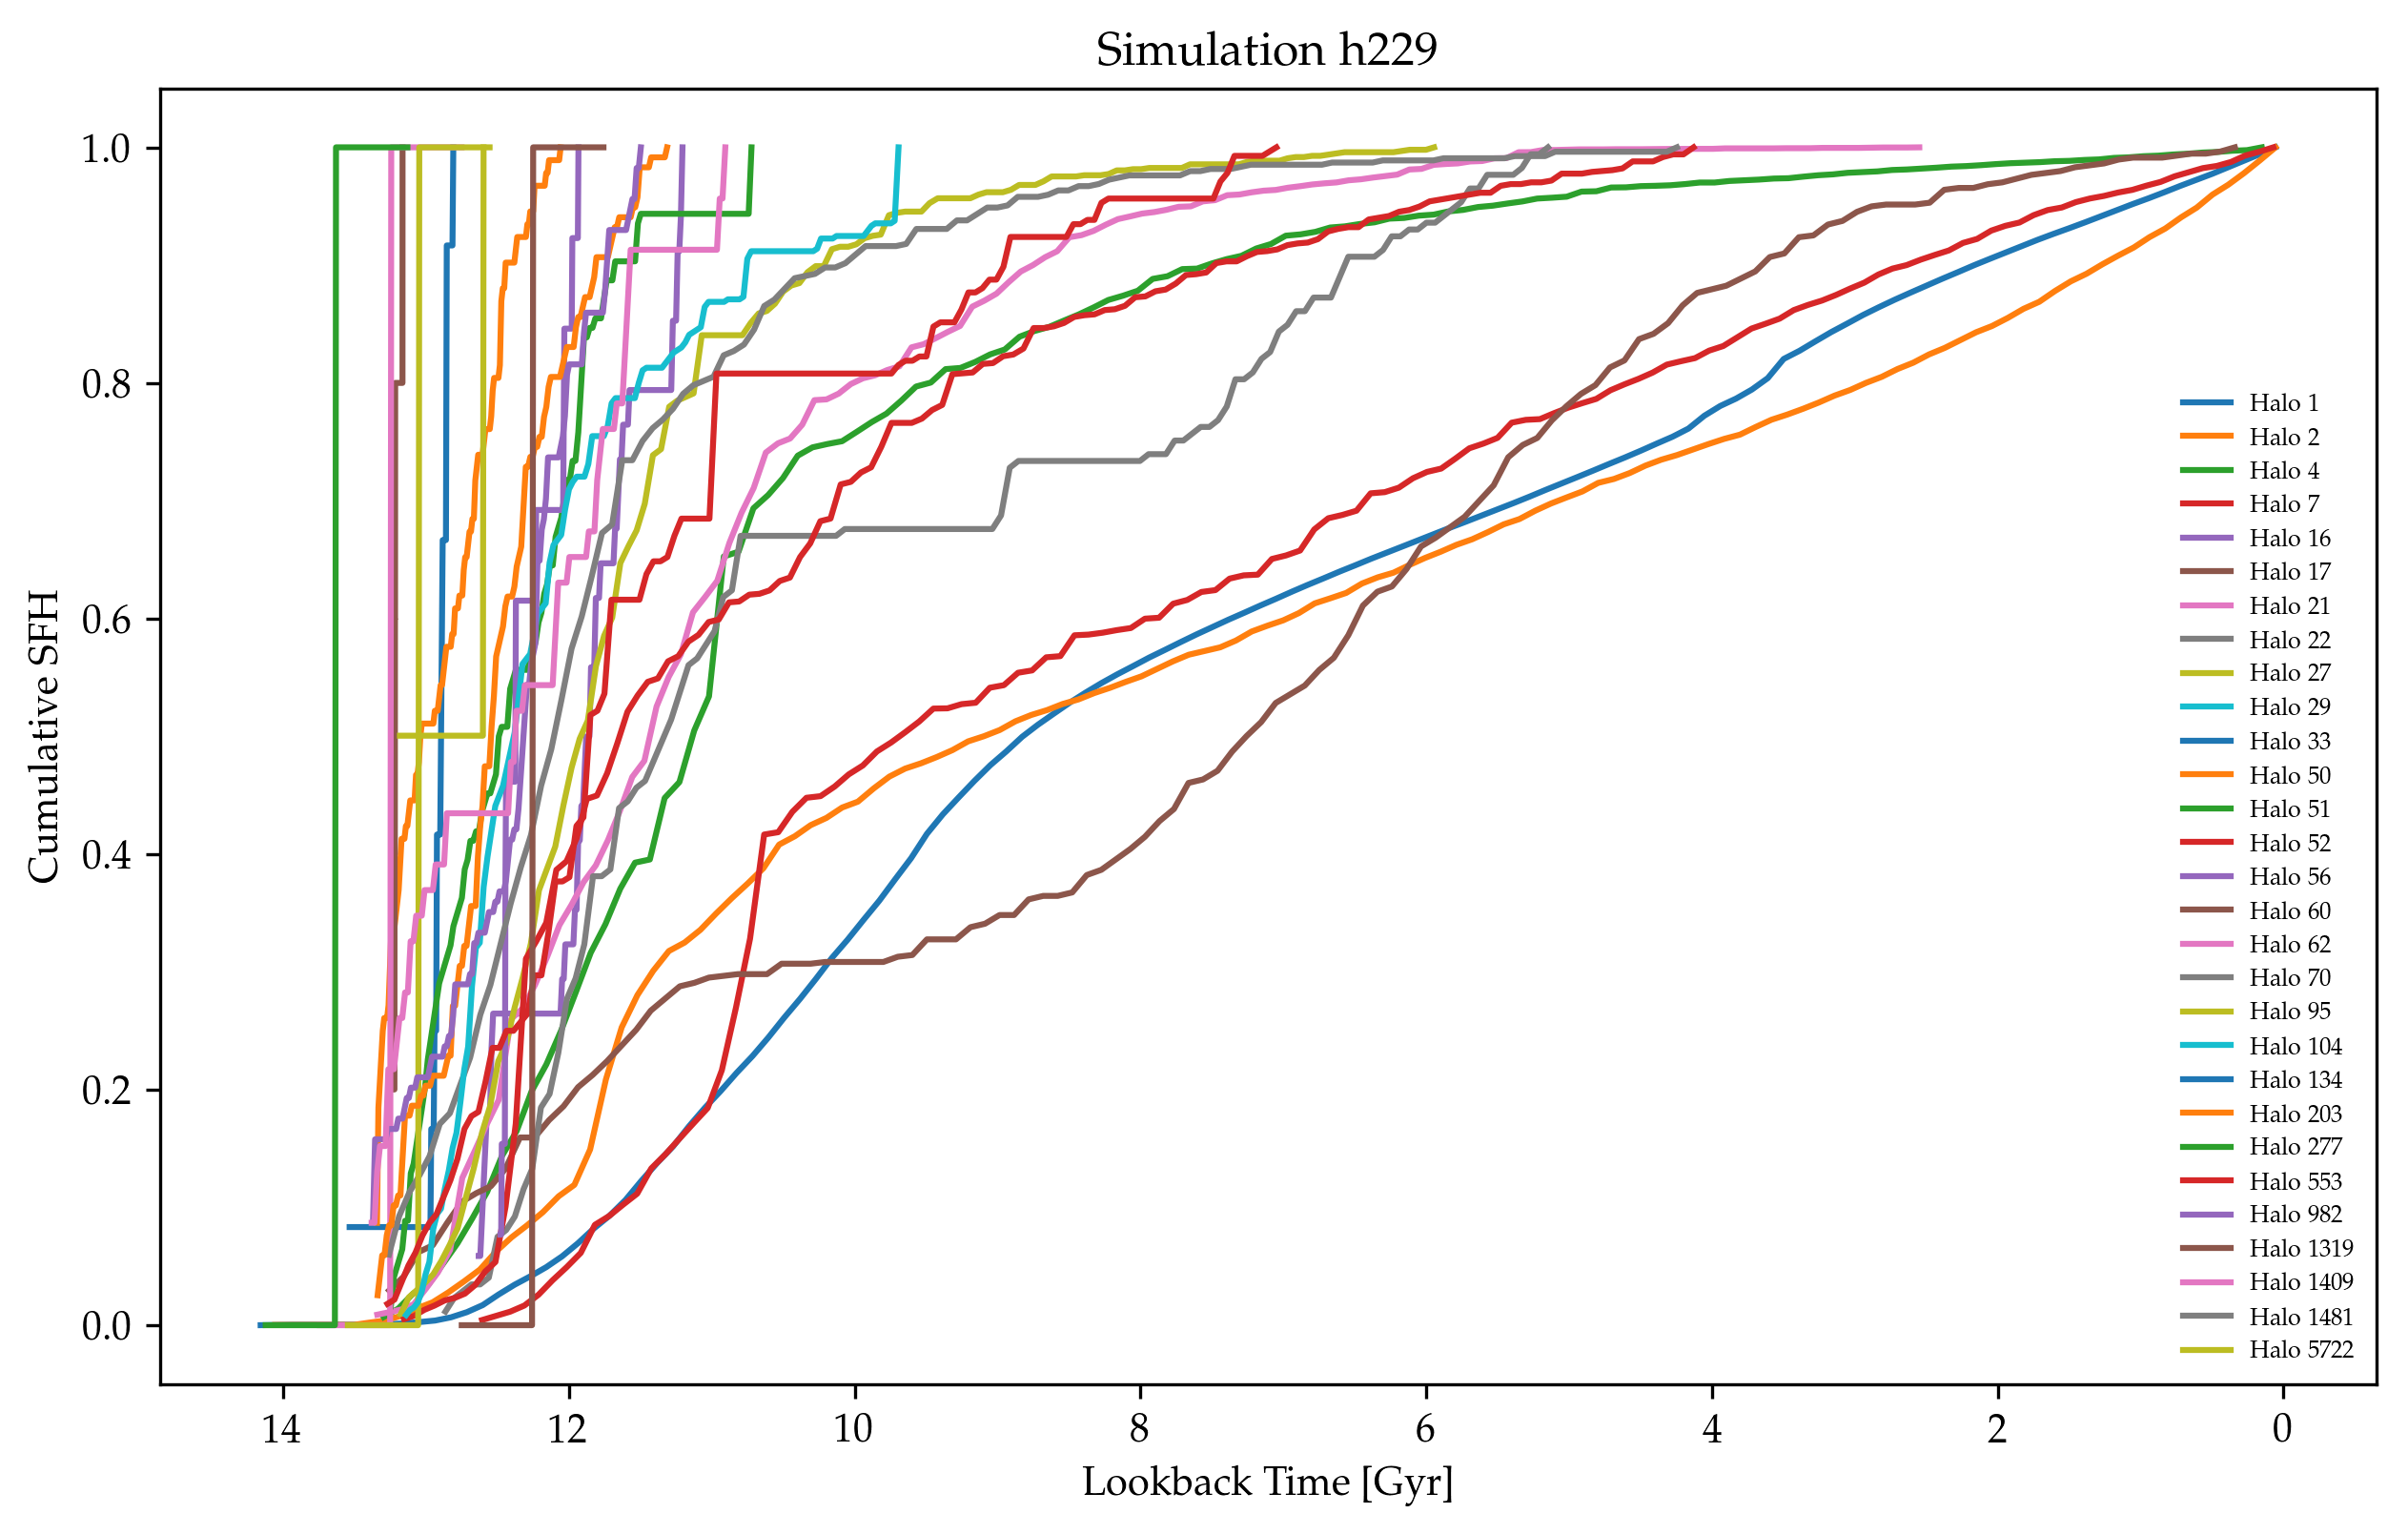

In [14]:
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(10,6),dpi=300)
for i in range(len(c_sfhs)):
    ax.plot(bcs[i],c_sfhs[i],label='Halo %s' % num[i])
ax.set_xlabel('Lookback Time [Gyr]')
ax.set_ylabel('Cumulative SFH')
ax.set_title('Simulation %s' % name)
ax.invert_xaxis()
ax.legend(prop={'size':6},frameon=False)
plt.show()

In [15]:
x = 0
sim = sims[x]
num = nums[x]
name = names[x]

c_sfhs = []
bcs = []

s = pynbody.load(sim)
s.physical_units()
h = s.halos()
print('Loaded simulation %s' % name)
for i in num:
    c_sfh, bc = cumulative_sfh(h[i])
    print('Finished halo %s' % i)
    c_sfhs.append(c_sfh)
    bcs.append(bc)

Loaded simulation h148
Finished halo 1
Finished halo 2
Finished halo 3
Finished halo 5
Finished halo 6
Finished halo 9
Finished halo 10
Finished halo 11
Finished halo 12
Finished halo 14
Finished halo 18
Finished halo 23
Finished halo 26
Finished halo 28
Finished halo 30
Finished halo 31
Finished halo 34
Finished halo 36
Finished halo 38
Finished halo 42
Finished halo 45
Finished halo 46
Finished halo 55
Finished halo 57
Finished halo 60
Finished halo 64
Finished halo 77
Finished halo 80
Finished halo 94
Finished halo 99
Finished halo 115
Finished halo 125
Finished halo 126
Finished halo 131
Finished halo 160
Finished halo 223
Finished halo 252
Finished halo 264
Finished halo 271
Finished halo 304
Finished halo 353
Finished halo 372
Finished halo 373
Finished halo 435
Finished halo 465
Finished halo 590


/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/array.py:346: RuntimeWarning: invalid value encountered in true_divide
  return np.ndarray.__truediv__(self, rhs)


Finished halo 647
Finished halo 677
Finished halo 682
Finished halo 738


/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/plot/stars.py:632: RuntimeWarning: divide by zero encountered in true_divide
  binnorm = 1e-9 * bins / (trange[1] - trange[0])


Finished halo 869
Finished halo 961
Finished halo 980
Finished halo 1146
Finished halo 1155
Finished halo 1381
Finished halo 2792
Finished halo 4897


<Figure size 432x288 with 0 Axes>

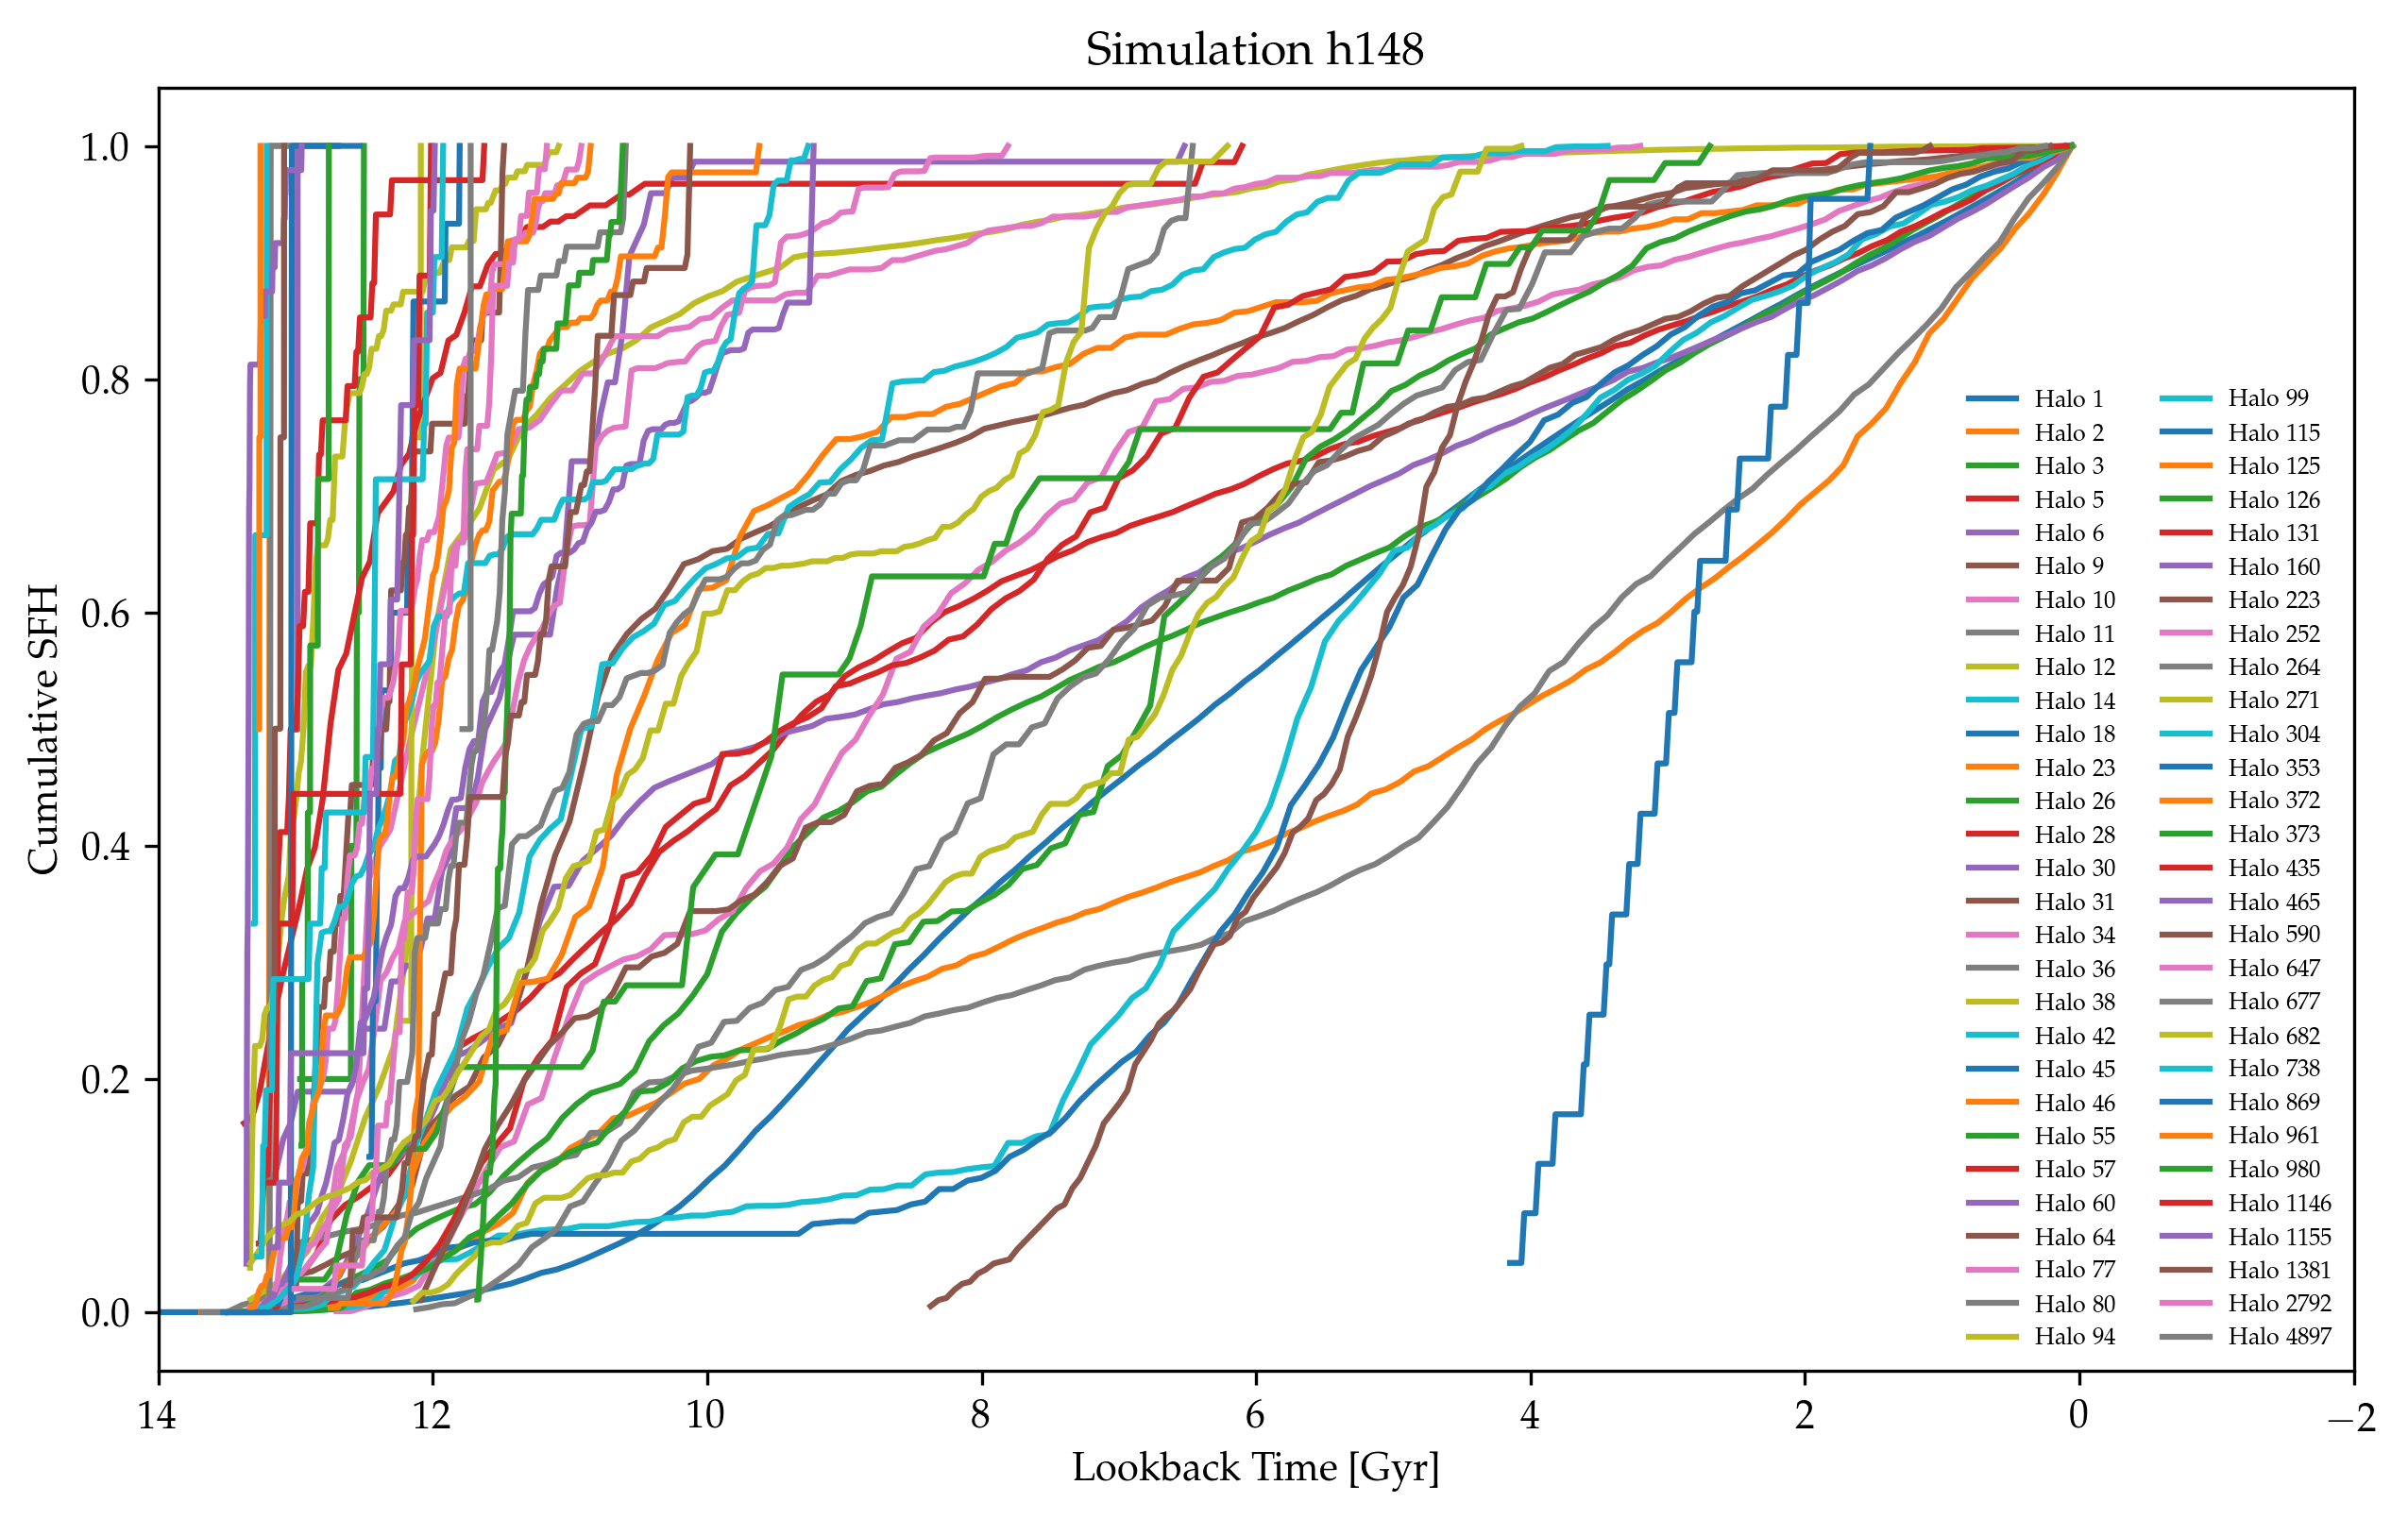

In [19]:
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(10,6),dpi=300)
for i in range(len(c_sfhs)):
    ax.plot(bcs[i],c_sfhs[i],label='Halo %s' % num[i])
ax.set_xlabel('Lookback Time [Gyr]')
ax.set_ylabel('Cumulative SFH')
ax.set_title('Simulation %s' % name)
ax.invert_xaxis()
ax.set_xlim(14,-2)
ax.legend(prop={'size':6},frameon=False,ncol=2)
plt.show()